In [39]:
from scipy.optimize import fsolve
from scipy.special import softmax
import numpy as np

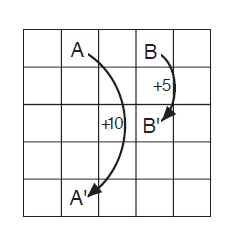

Above image shows a rectangular gridworld representation of a simple finite MDP. 
<ol>
<li>The cells of the grid correspond to the states of the environment.</li>
<li>Ateach cell, four actions are possible: <b>north, south, east, and west</b>, which deterministically cause the agent to move one cell in the respective direction on the grid.</li>
<li>Actions that would take the agent out of the grid leave its location unchanged, but also result in a reward of −1.</li>
<li>Other actions result in a reward of 0, except those that move the agent out of the special states A and B. </li>
<li>From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. </li>
</ol>

We used below formula to from below non-linear equation and then solve those
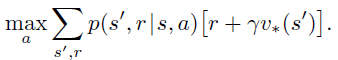


In [33]:
def func(x):
    '''
        for each state we have taken all the posible action and then formed the equation
        '''
    eq = [
        x[0]-np.max([(-1 + .9*x[0]),(-1 + .9*x[0]),(.9*x[1]),(.9*x[5])]), 
        x[1]-10- .9*x[21],
        x[2]-np.max([(.9*x[1]),(.9 *x[2] - .25),(.9*x[3]),(.9*x[7])]),
        x[3]- 5 -.9*x[13],
        x[4]-np.max([(-1 + .9*x[4]),(-1 + .9*x[4]),(.9*x[3]),(.9*x[9])]),
        x[5]-np.max([(-1 + .9*x[5]),(.9*x[0]),(.9*x[10]),(.9*x[6])]),
        x[6]-np.max([(.9*x[1]),(.9*x[7]),(.9*x[11]),(.9*x[5])]),
        x[7]-np.max([(.9*x[2]),(.9*x[8]),(.9*x[12]),(.9*x[6])]),
        x[8]-np.max([(.9*x[3]),(.9*x[9]),(.9*x[13]),(.9*x[7])]),
        x[9]-np.max([(-1 + .9*x[9]),(.9*x[4]),(.9*x[14]),(.9*x[8])]),
        x[10]-np.max([(.9*x[5]),(.9*x[11]),(.9*x[15]),(.9*x[10]-1)]),
        x[11]-np.max([(.9*x[6]),(.9*x[12]),(.9*x[16]),(.9*x[10])]),
        x[12]-np.max([(.9*x[7]),(.9*x[13]),(.9*x[17]),(.9*x[11])]),
        x[13]-np.max([(.9*x[8]),(.9*x[14]),(.9*x[18]),(.9*x[12])]),
        x[14]-np.max([(.9*x[9]),(.9*x[14]-1),(.9*x[19]),(.9*x[13])]),
        x[15]-np.max([(.9*x[10]),(.9*x[16]),(.9*x[20]),(.9*x[15]-1)]),
        x[16]-np.max([(.9*x[11]),(.9*x[17]),(.9*x[21]),(.9*x[15])]),
        x[17]-np.max([(.9*x[12]),(.9*x[18]),(.9*x[22]),(.9*x[16])]),
        x[18]-np.max([(.9*x[13]),(.9*x[19]),(.9*x[23]),(.9*x[17])]),
        x[19]-np.max([(.9*x[14]),(.9*x[19]-1),(.9*x[24]),(.9*x[18])]),
        x[20]-np.max([(.9*x[15]),(.9*x[21]),(.9*x[20]-1),(.9*x[20]-1)]),
        x[21]-np.max([(.9*x[16]),(.9*x[22]),(.9*x[21]-1),(.9*x[20])]),
        x[22]-np.max([(.9*x[17]),(.9*x[23]),(.9*x[22]-1),(.9*x[21])]),
        x[23]-np.max([(.9*x[18]),(.9*x[24]),(.9*x[23]-1),(.9*x[22])]),
        x[24]-np.max([(.9*x[19]),(.9*x[23]),(.9*x[24]-1),(.9*x[24]-1)]),
         ]
    return eq 

In [34]:
'''
fsolve will be used to solve the euation
'''
initialvalues = np.ones(25)
values = fsolve(func, initialvalues)

In [35]:
vs = np.round(values.reshape(5,5),1)

In [36]:
print(vs)

[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]


### Now we have to find Optimal policy

In [51]:
print("Probability of each action in Cell( i, j ) are: [N  E  S  W ]")
for i in range(5):
    for j in range(5):
        if(i == 0 and j==1):
            values  = [vs[4,1]]*4
        elif (i == 0 and j==3):
            values  = [vs[2,3]]*4
        else:
            ip = i+1 if i+1 < 5 else i
            jp = j+1 if j+1 < 5 else j
            im = i-1 if i-1 >= 0 else i
            jm = j-1 if j-1 >= 0 else j
            values  = [vs[im,j],vs[i,jp],vs[ip,j],vs[i,jm]]
#         print(values)
        maxv = np.max(values)
#         print(maxv)
        values = (values == maxv).astype(int)
#         print(values)
        prob = 1/np.sum(values)
#         print(prob)
        values = prob * values
        
        print("Probability of each action in Cell(",i,",",j,") are:", values)
        

Probability of each action in Cell( i, j ) are: [N  E  S  W ]
Probability of each action in Cell( 0 , 0 ) are: [0. 1. 0. 0.]
Probability of each action in Cell( 0 , 1 ) are: [0.25 0.25 0.25 0.25]
Probability of each action in Cell( 0 , 2 ) are: [0. 0. 0. 1.]
Probability of each action in Cell( 0 , 3 ) are: [0.25 0.25 0.25 0.25]
Probability of each action in Cell( 0 , 4 ) are: [0. 0. 0. 1.]
Probability of each action in Cell( 1 , 0 ) are: [0.5 0.5 0.  0. ]
Probability of each action in Cell( 1 , 1 ) are: [1. 0. 0. 0.]
Probability of each action in Cell( 1 , 2 ) are: [0.5 0.  0.  0.5]
Probability of each action in Cell( 1 , 3 ) are: [0. 0. 0. 1.]
Probability of each action in Cell( 1 , 4 ) are: [0. 0. 0. 1.]
Probability of each action in Cell( 2 , 0 ) are: [0.5 0.5 0.  0. ]
Probability of each action in Cell( 2 , 1 ) are: [1. 0. 0. 0.]
Probability of each action in Cell( 2 , 2 ) are: [0.5 0.  0.  0.5]
Probability of each action in Cell( 2 , 3 ) are: [0.5 0.  0.  0.5]
Probability of each 